# ENGR 484/585
## Heat Exchanger Sizing Project
Jonathan Loewen \
David Nguyen \
Reza Zarghanishiraz

python imports to enable effective calculation/analysis of the problem

In [1]:
import numpy as np

## Given Values

In [2]:
k = 18 #w/mK
t_plate = .5E-3 #m
K_c = 0.36
K_e = 0.42
epsilon = 0.8381

In [3]:
T_h_i = 900+273.15 #K
T_c_i = 200+273.15 #K
mdot_hot = 1.66 #kg/s
mdot_cold = 2 #kg/s
deltaP_h_specified = 9.5E3 #Pa
deltaP_h = deltaP_h_specified
deltaP_c_specified = 8.79E3 #Pa
deltaP_c = deltaP_c_specified
P_o_h = 160E3 #Pa
P_o_c = 200E3 #Pa

## Step 1: Compute Tm’s and determine properties
We assume that the outlet temperatures will be $T_{h,0}$ = 300°C , $T_{c,i}$ = 700°C . Therefore, $T_{h,m}$ = 600°C , $T_{c,m}$ = 450°C.
Based on $T_m$’s, the inlet pressures and this website, we can calculate the properties:

In [4]:
cp_h = 1.116 #kJ/(kg K)
cp_c = 1.08125 #kJ/(kg K)

C_h = cp_h * mdot_hot
C_c = cp_c * mdot_cold
C_r = C_h/C_c
print(f"C_h:{C_h}, C_c:{C_c}, C_r:{C_r}")

C_h:1.85256, C_c:2.1625, C_r:0.8566751445086704


In [5]:
C_min = min([C_h,C_c])
C_min

1.85256

$q=\epsilon C_{min} (T_{h,i}-T_{c,i})=\dot{m}_h c_{p,h} (T_{h,i}-T_{h,o}) = \dot{m}_c c_{p,c} (T_{c,o}-T_{c,i})$

In [6]:
q = epsilon * C_min * (T_h_i - T_c_i)
T_h_o = T_h_i - q / (mdot_hot * cp_h) 
T_c_o = T_c_i + q / (mdot_cold * cp_c) 
print(f"q: {q}, T_h_o:{T_h_o} K, T_c_o:{T_c_o} K")

q: 1086.8413752000001, T_h_o:586.48 K, T_c_o:975.7356070289018 K


because $C_r \geq 0.5$

$T_{c,m}=(T_{c,i}+T_{c,o})/2$

$T_{h,m}=(T_{h,i}+T_{h,o})/2$

In [7]:
T_h_m = (T_h_i + T_h_o)/2
T_c_m = (T_c_o + T_c_i)/2
print(f"T_h_m:{T_h_m} K, T_c_m:{T_c_m} K")

T_h_m:879.815 K, T_c_m:724.4428035144508 K


## Iteration #2

In [8]:
C_h = cp_h * mdot_hot
C_c = cp_c * mdot_cold
C_r = C_h/C_c
print(f"C_h:{C_h}, C_c:{C_c}, C_r:{C_r}")

C_min = min([C_h,C_c])

q = epsilon * C_min * (T_h_i - T_c_i)
T_h_o = T_h_i - q / (mdot_hot * cp_h) 
T_c_o = T_c_i + q / (mdot_cold * cp_c) 
print(f"q: {q}, T_h_o:{T_h_o} K, T_c_o:{T_c_o} K")

T_h_m = (T_h_i + T_h_o)/2
T_c_m = (T_c_o + T_c_i)/2
print(f"T_h_m:{T_h_m} K, T_c_m:{T_c_m} K")

C_h:1.85256, C_c:2.1625, C_r:0.8566751445086704
q: 1086.8413752000001, T_h_o:586.48 K, T_c_o:975.7356070289018 K
T_h_m:879.815 K, T_c_m:724.4428035144508 K


Since $T_m$ did not change significantly in comparison to results at step 1, the above temperatures are accepted as
final answers.

Based on the above $T_m$'s we have: 

In [9]:
mu_h = 39.48E-6 #Pa*s
cp_h = 1.117 #kJ/kgK
k_h = 51.505E-3 #W/mk
Pr_h = 0.725
rho_h = 0.6329 #kg/m^3

In [10]:
mu_c = 35.03E-6 #Pa*s
cp_c = 1.082 #kJ/kgK
k_c = 52.895E-3 #W/mk
Pr_c = 0.716
rho_c = 0.9646 #kg/m^3

## Step 2: Determine NTU
Compute $C_r$ and $\epsilon$

$C_r=C_{min}/C_{max}$

$\epsilon=\frac{q}{C_{min} (T_{h,i}-T_{c,i})}=\frac{ C_h(T_{h,i}-T_{h,o})}{C_{min}(T_{h,i}-T_{c,i})}$

For a single-pass cross flow heat exchanger and both fluids unmixed, we have the following explicit 𝜖 − 𝑁𝑇𝑈 correlation
that using numerical methods and iterations, by substituting $𝐶_r$ and 𝜖 values, 𝑵𝑻𝑼 = 𝟖. 𝟎𝟏𝟖 is achieved.

In [11]:
NTU=8.018

## Step 3: Determine ntu’s by approximations. The approximations can be from past experience or as follows.

Since both fluids in the HX are gas and $C_h$ value is comparable with $C_c$ we estimate: $𝒏𝒕𝒖_𝒄$ = $𝒏𝒕𝒖_𝒉$ = 𝟐𝑵𝑻𝑼 = 𝟏𝟔. 𝟎𝟑𝟔

In [12]:
ntu_h = 16.036
ntu_c = 16.036

## Step 4: Approximate mean value of $𝒋_𝑯/𝑪_𝒑$

![jH-vs-Re.png](jH-vs-Re.png)
$\bar{j_H/c_f}=0.27$ seems to be a robust approximation based on the above diagram.

In [13]:
jH_over_Cf = 0.27

## Step 5: Mass velocity (G)
$ G = \left[ \frac{2}{(1/\rho)_m Pr^{2/3}} \frac{ \eta_o \Delta p }{ntu} (\frac{j_H}{C_f}) \right]^{1/2} $

where
$(1/\rho)_m \approx (1/2)(1/\rho_i + 1/\rho_o)$ 
and assuming $\eta_o=0.8$ 

In [14]:
eta_not = 0.8

In [15]:
rhoh_i=0.4745 #kg/m^3
rhoh_o=0.9517 #kg/m^3
rhoc_i=1.4702 #kg/m^3
rhoc_o=0.713 #kg/m^3

In [16]:
reciprocal_rho_mh = (1/2) * (1/rhoh_i + 1/rhoh_o)
reciprocal_rho_mc = (1/2) * (1/rhoc_i + 1/rhoc_o)
print(f"1/rho_mh:{reciprocal_rho_mh} m^3/kg, 1/rho_mc:{reciprocal_rho_mc} m^3/kg")

1/rho_mh:1.5791164233533403 m^3/kg, 1/rho_mc:1.0413520557926592 m^3/kg


In [17]:
G_h = np.sqrt( 2/(reciprocal_rho_mh * Pr_h**(2/3)) * (eta_not * deltaP_h)/ntu_h * jH_over_Cf )
G_c = np.sqrt( 2/(reciprocal_rho_mc * Pr_c**(2/3)) * (eta_not * deltaP_c)/ntu_c * jH_over_Cf )
print(f"G_h={G_h} kg/(m^2 s), G_c={G_c} kg/(m^2 s)")

G_h=14.171067767644109 kg/(m^2 s), G_c=16.855895249074063 kg/(m^2 s)


## Step 6: Determine jH and Cf

- Calculate Re's \
$Re=\frac{GD_h}{\mu}$
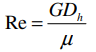

In [18]:
# [m]
Dh = 0.00154
rh = Dh/4

Reh = (G_h*Dh)/mu_h
Rec = (G_c*Dh)/mu_c
print(f'Re for hot flow:{Reh} , Re for cold flow:{Rec}')

Re for hot flow:552.772146964841 , Re for cold flow:741.024227335828


- 6.2 Determine jH , Cf from given design data according to computed Re’s

![jH-and-Cf.png](jH-and-Cf.png)
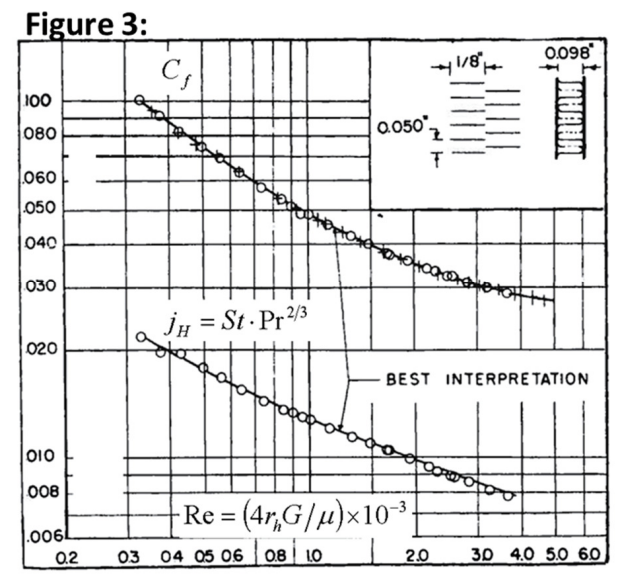

In [19]:
Re_h = ((4*(Dh/4)*G_h)/mu_h)*10**-3
Re_c = ((4*(Dh/4)*G_c)/mu_c)*10**-3
jH_h = 0.135
Cf_h = 0.48
jH_c = 0.115
Cf_c = 0.41
print(f"Re_h={Re_h}, Re_c={Re_c}")
print(f'jH hot is {jH_h} and Cf hot is {Cf_h}')
print(f'jH cold is {jH_c} and Cf cold is {Cf_c}')

Re_h=0.552772146964841, Re_c=0.741024227335828
jH hot is 0.135 and Cf hot is 0.48
jH cold is 0.115 and Cf cold is 0.41


## Step 7: Determine overall heat transfer coefficient

- 7.1 Compute h’s, ηo’s

$h=j_H G c_P Pr^{-2/3}$

$\eta_f= \frac{tanh(ml)}{ml}$

$m = \sqrt{ \frac{h P}{k_f A_k} }$

$\eta_o=1-(1-\eta_f)\frac{A_f}{A}$



![fins.png](fins.png)
![fininfo.png](fininfo.png)

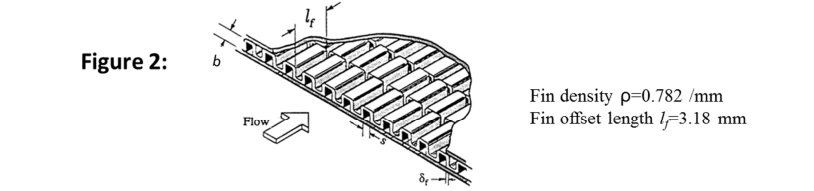
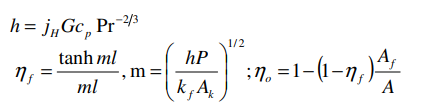
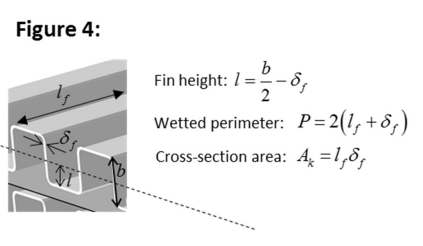

In [20]:
h_h = jH_h*G_h*cp_h*Pr_h**(-2/3)
h_c = jH_c*G_c*cp_c*Pr_c**(-2/3)

kf = 18
b = 0.00249
fin_thickness = 0.000102
lf = 0.00318
l = (b/2) - fin_thickness
P = 2*(lf+fin_thickness)
Ak = lf*fin_thickness

m_h = ((h_h*P)/(kf*Ak))**0.5
m_c = ((h_c*P)/(kf*Ak))**0.5
nf_h = (np.tanh(m_h*l))/(m_h*l)
nf_c = (np.tanh(m_c*l))/(m_c*l)

fin_area = 0.785
no_h = 1 - (1-nf_h)*fin_area
no_c = 1 - (1-nf_c)*fin_area
print(f'for hot flow parameters h and no is:{h_h,no_h} and for cold flow parameters h and no is:{h_c,no_c}')

for hot flow parameters h and no is:(2.6478752005486035, 0.9989839102576888) and for cold flow parameters h and no is:(2.6206050682138424, 0.9989943587511805)


- Compute $U_h$

$\frac{1}{U_h}=\frac{1}{(\eta_o h)_h}+(\frac{R''_f}{\eta_o})_h + \frac{\alpha_h}{\alpha_c}[(\frac{R''_f}{\eta_o})_c + \frac{1}{(\eta_o h)_c}]$

where $\alpha_h/\alpha_c=A_h/A_c; \alpha=A/V$
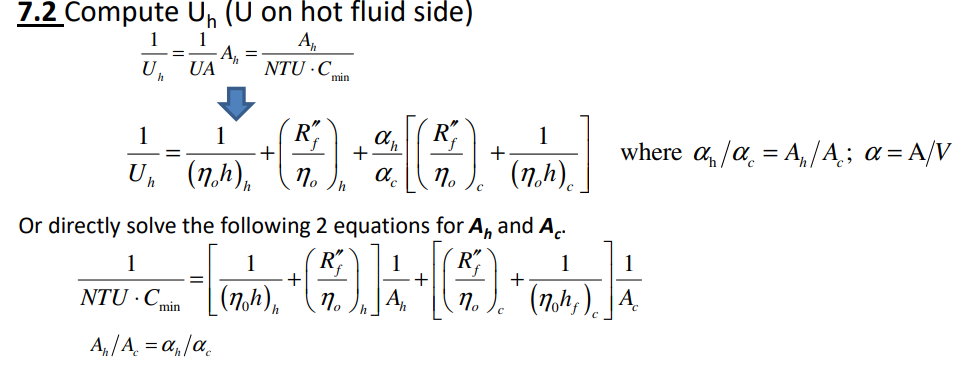

In [21]:
Rf = 1/kf
# same area/volume for both hot and cold flow (already discussed with the master's student about this)
alpha_h_over_alpha_c = 1
U_h = ((1/(no_h*h_h))+(Rf/no_h)+(alpha_h_over_alpha_c)*((Rf/no_c)+1/(no_c*h_c)))**-1
print(f'the U on the hot fluid side is: {U_h}')

the U on the hot fluid side is: 1.14778360206337


## Step 8: Calculate core dimensions

### Heat transfer areas
$A_h=\frac{NTU * C_{min}}{U_h}$

$A_c=\frac{A_c}{A_h}A_h=\frac{\alpha_c}{\alpha_h}A_h$
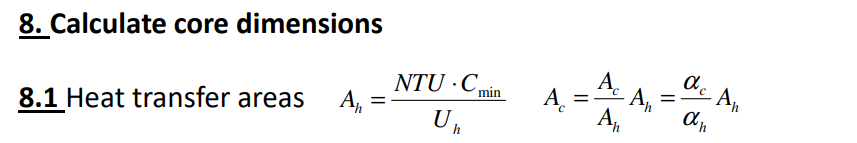

In [22]:
Ah = (NTU * C_min)/U_h
Ac = Ah
print(f'Heat transfer areas Ah and Ac:{Ah,Ac}')

Heat transfer areas Ah and Ac:(12.941312328645648, 12.941312328645648)


### Free flow Areas
$A_{o,h}=\left(\frac{\dot{m}}{G}\right)_h$

$A_{o,c}=\left(\frac{\dot{m}}{G}\right)_c$
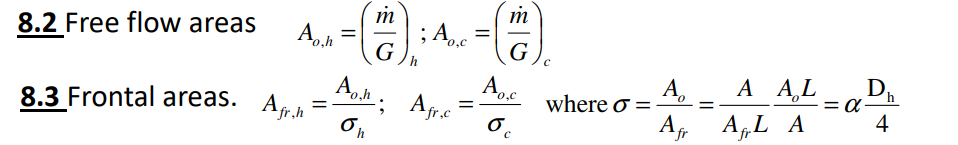

### Frontal Areas
$A_{fr,h}=\frac{A_{o,h}}{\sigma_h}$

$A_{fr,c}=\frac{A_{o,c}}{\sigma_c}$

where $\sigma=\frac{A_o}{A_{fr}}=\frac{A}{A_{fr}L}\frac{A_oL}{A}=\alpha \frac{D_h}{4}$

In [23]:
mdot_hot = 1.66
mdot_cold = 2
alpha = 941.6
Ao_h = (mdot_hot/G_h)
Ao_c = (mdot_cold/G_c)
print(f'Free flow areas Ao_h and Ao_c:{Ao_h,Ao_c}')
sigma = alpha*(Dh/4)
# note sigma hot is equal to sigma cold
Afr_h = Ao_h/sigma
Afr_c = Ao_c/sigma
print(f'Frontal areas Afr_h and Afr_c:{Afr_h,Afr_c}')

Free flow areas Ao_h and Ao_c:(0.1171400791541038, 0.11865284937089682)
Frontal areas Afr_h and Afr_c:(0.3231307836181128, 0.32730375865036804)


### Core Lengths

![boxflow.png](boxflow.png)
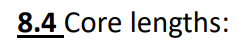
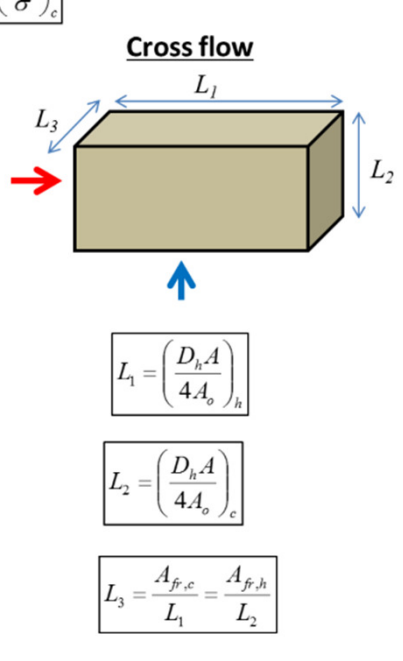

In [24]:
L1 = (Dh*Ah)/(4*Ao_h)
L2 = (Dh*Ac)/(4*Ao_c)
L3 = Afr_c/L1
print(f'The core legnths are:{L1,L2,L3}')

The core legnths are:(0.04253373638218192, 0.04199145046196134, 7.695156515510849)


## Step 9: Compute pressure drop $\Delta p$ for each flow
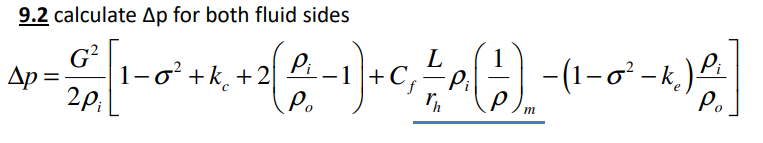

$ \Delta P = \frac{G}{2 \rho_i} \left[  1-\sigma^2+k_c+2(\frac{\rho_i}{\rho_o}-1) + C_f \frac{L}{r_h} \rho_i (\frac{1}{\rho})_m - (1-\sigma^2-k_e) \frac{\rho_i}{\rho_o} \right]$

In [25]:
# [kg/m^3]
rhom_h = 0.5*((1/rhoh_i)+(1/rhoh_o))
rhom_c = 0.5*((1/rhoc_i)+(1/rhoc_o))
Kc = 0.36 
Ke = 0.42

deltaP_h = (G_h**2/(2*rhoh_i))*(1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
deltaP_c = (G_c**2/(2*rhoc_i))*(1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
print(f'Computed pressure drop for hot and cold flow is: {deltaP_h,deltaP_c} Pa')
print(f'Given pressure drop for hot and cold flow is: {deltaP_h_specified} and {deltaP_c_specified} Pa')

Computed pressure drop for hot and cold flow is: (3372.345142856043, 6334.995096471146) Pa
Given pressure drop for hot and cold flow is: 9500.0 and 8790.0 Pa


## Step 10: Iterate until $\Delta P$ agrees

Iteration starts with:

$G= \sqrt{ 2\rho_i \Delta P / \left[  1-\sigma^2+k_c+2(\frac{\rho_i}{\rho_o}-1) + C_f \frac{L}{r_h} \rho_i (\frac{1}{\rho})_m - (1-\sigma^2-k_e) \frac{\rho_i}{\rho_o} \right] }$

Using:

$\Delta P$: specified values 

$C_f$: corrected $C_f$ from previous iteration

L: previous iteration

$K_c, K_e$: based on dimensions determined in previous iteration

In [26]:
#step 11
deltaP_h = deltaP_h_specified
deltaP_c = deltaP_c_specified

boxed_values_h = (1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
G_h = np.sqrt( 2*rhoh_i*deltaP_h/boxed_values_h )

boxed_values_c = (1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
G_c = np.sqrt( 2*rhoc_i*deltaP_c/boxed_values_c )

print(f"G_c={G_c}, G_h={G_h}")

#step 6
Reh = (G_h*Dh)/mu_h
Rec = (G_c*Dh)/mu_c
print(f'Re for hot flow:{Reh} , Re for cold flow:{Rec}')

Re_h = ((4*(Dh/4)*G_h)/mu_h)*10**-3
Re_c = ((4*(Dh/4)*G_c)/mu_c)*10**-3
jH_h = 0.015
Cf_h = 0.050
jH_c = 0.015
Cf_c = 0.0525

#step 7
h_h = jH_h*G_h*cp_h*Pr_h**(-2/3)
h_c = jH_c*G_c*cp_c*Pr_c**(-2/3)

kf = 18
b = 0.00249
fin_thickness = 0.000102
lf = 0.00318
l = (b/2) - fin_thickness
P = 2*(lf+fin_thickness)
Ak = lf*fin_thickness

m_h = ((h_h*P)/(kf*Ak))**0.5
m_c = ((h_c*P)/(kf*Ak))**0.5
nf_h = (np.tanh(m_h*l))/(m_h*l)
nf_c = (np.tanh(m_c*l))/(m_c*l)

fin_area = 0.785
no_h = 1 - (1-nf_h)*fin_area
no_c = 1 - (1-nf_c)*fin_area
print(f'for hot flow parameters h and no is:{h_h,no_h} and for cold flow parameters h and no is:{h_c,no_c}')

Rf = 1/kf
# same area/volume for both hot and cold flow (already discussed with the master's student about this)
alpha_h_over_alpha_c = 1
U_h = ((1/(no_h*h_h))+(Rf/no_h)+(alpha_h_over_alpha_c)*((Rf/no_c)+1/(no_c*h_c)))**-1
print(f'the U on the hot fluid side is: {U_h}')

#step 8
Ah = (NTU * C_min)/U_h
Ac = Ah
print(f'Heat transfer areas Ah and Ac:{Ah,Ac}')

mdot_hot = 1.66
mdot_cold = 2
alpha = 941.6
Ao_h = (mdot_hot/G_h)
Ao_c = (mdot_cold/G_c)
print(f'Free flow areas Ao_h and Ao_c:{Ao_h,Ao_c}')
sigma = alpha*(Dh/4)
# note sigma hot is equal to sigma cold
Afr_h = Ao_h/sigma
Afr_c = Ao_c/sigma
print(f'Frontal areas Afr_h and Afr_c:{Afr_h,Afr_c}')

L1 = (Dh*Ah)/(4*Ao_h)
L2 = (Dh*Ac)/(4*Ao_c)
L3 = Afr_c/L1
print(f'The core legnths are:{L1,L2,L3}')

#step 9
# [kg/m^3]
rhom_h = 0.5*((1/rhoh_i)+(1/rhoh_o))
rhom_c = 0.5*((1/rhoc_i)+(1/rhoc_o))
Kc = 0.36 
Ke = 0.42

deltaP_h = (G_h**2/(2*rhoh_i))*(1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
deltaP_c = (G_c**2/(2*rhoc_i))*(1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
print(f'Computed pressure drop for hot and cold flow is: {deltaP_h,deltaP_c} Pa')
print(f'Given pressure drop for hot and cold flow is: {deltaP_h_specified} and {deltaP_c_specified} Pa')

G_c=19.85514759112366, G_h=23.784737870974396
Re for hot flow:927.7734630521926 , Re for cold flow:872.8783125986422
for hot flow parameters h and no is:(0.4937996721578364, 0.9998102706763938) and for cold flow parameters h and no is:(0.4026394195587533, 0.9998452882828873)
the U on the hot fluid side is: 0.2164210164074873
Heat transfer areas Ah and Ac:(68.63393549558305, 68.63393549558305)
Free flow areas Ao_h and Ao_c:(0.06979265481104056, 0.10072954586820143)
Frontal areas Afr_h and Afr_c:(0.1925229639823913, 0.27786234502256846)
The core legnths are:(0.37860811051450965, 0.262326856912209, 0.7339048934925544)
Computed pressure drop for hot and cold flow is: (8808.728436917807, 7096.585466733327) Pa
Given pressure drop for hot and cold flow is: 9500.0 and 8790.0 Pa


### Iteration 3

In [27]:
#step 11
deltaP_h = deltaP_h_specified
deltaP_c = deltaP_c_specified

boxed_values_h = (1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
G_h = np.sqrt( 2*rhoh_i*deltaP_h/boxed_values_h )

boxed_values_c = (1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
G_c = np.sqrt( 2*rhoc_i*deltaP_c/boxed_values_c )

print(f"G_c={G_c}, G_h={G_h}")

#step 6
Reh = (G_h*Dh)/mu_h
Rec = (G_c*Dh)/mu_c
print(f'Re for hot flow:{Reh} , Re for cold flow:{Rec}')

Re_h = ((4*(Dh/4)*G_h)/mu_h)*10**-3
Re_c = ((4*(Dh/4)*G_c)/mu_c)*10**-3
print(f'modified Re for hot flow:{Re_h} , modified Re for cold flow:{Re_c}')
jH_h = 0.015
Cf_h = 0.050
jH_c = 0.015
Cf_c = 0.050

#step 7
h_h = jH_h*G_h*cp_h*Pr_h**(-2/3)
h_c = jH_c*G_c*cp_c*Pr_c**(-2/3)

kf = 18
b = 0.00249
fin_thickness = 0.000102
lf = 0.00318
l = (b/2) - fin_thickness
P = 2*(lf+fin_thickness)
Ak = lf*fin_thickness

m_h = ((h_h*P)/(kf*Ak))**0.5
m_c = ((h_c*P)/(kf*Ak))**0.5
nf_h = (np.tanh(m_h*l))/(m_h*l)
nf_c = (np.tanh(m_c*l))/(m_c*l)

fin_area = 0.785
no_h = 1 - (1-nf_h)*fin_area
no_c = 1 - (1-nf_c)*fin_area
print(f'for hot flow parameters h and no is:{h_h,no_h} and for cold flow parameters h and no is:{h_c,no_c}')

Rf = 1/kf
# same area/volume for both hot and cold flow (already discussed with the master's student about this)
alpha_h_over_alpha_c = 1
U_h = ((1/(no_h*h_h))+(Rf/no_h)+(alpha_h_over_alpha_c)*((Rf/no_c)+1/(no_c*h_c)))**-1
print(f'the U on the hot fluid side is: {U_h}')

#step 8
Ah = (NTU * C_min)/U_h
Ac = Ah
print(f'Heat transfer areas Ah and Ac:{Ah,Ac}')

mdot_hot = 1.66
mdot_cold = 2
alpha = 941.6
Ao_h = (mdot_hot/G_h)
Ao_c = (mdot_cold/G_c)
print(f'Free flow areas Ao_h and Ao_c:{Ao_h,Ao_c}')
sigma = alpha*(Dh/4)
# note sigma hot is equal to sigma cold
Afr_h = Ao_h/sigma
Afr_c = Ao_c/sigma
print(f'Frontal areas Afr_h and Afr_c:{Afr_h,Afr_c}')

L1 = (Dh*Ah)/(4*Ao_h)
L2 = (Dh*Ac)/(4*Ao_c)
L3 = Afr_c/L1
print(f'The core legnths are:{L1,L2,L3}')

#step 9
# [kg/m^3]
rhom_h = 0.5*((1/rhoh_i)+(1/rhoh_o))
rhom_c = 0.5*((1/rhoc_i)+(1/rhoc_o))
Kc = 0.36 
Ke = 0.42

deltaP_h = (G_h**2/(2*rhoh_i))*(1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
deltaP_c = (G_c**2/(2*rhoc_i))*(1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
print(f'Computed pressure drop for hot and cold flow is: {deltaP_h,deltaP_c} Pa')
print(f'Given pressure drop for hot and cold flow is: {deltaP_h_specified} and {deltaP_c_specified} Pa')

G_c=22.09748452744677, G_h=24.700375834414434
Re for hot flow:963.4898375126196 , Re for cold flow:971.4566420858699
modified Re for hot flow:0.9634898375126196 , modified Re for cold flow:0.9714566420858699
for hot flow parameters h and no is:(0.5128094139769266, 0.999802968891176) and for cold flow parameters h and no is:(0.4481114181098956, 0.9998278205462716)
the U on the hot fluid side is: 0.2329085703018673
Heat transfer areas Ah and Ac:(63.775352108118256, 63.775352108118256)
Free flow areas Ao_h and Ao_c:(0.06720545513672559, 0.09050803938863931)
Frontal areas Afr_h and Afr_c:(0.18538617643559344, 0.24966633028235805)
The core legnths are:(0.36534996320868357, 0.2712854098650105, 0.683362133362941)
Computed pressure drop for hot and cold flow is: (9167.374843720385, 8663.401104548104) Pa
Given pressure drop for hot and cold flow is: 9500.0 and 8790.0 Pa


### Iteration 4

In [28]:
#step 11
deltaP_h = deltaP_h_specified
deltaP_c = deltaP_c_specified

boxed_values_h = (1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
G_h = np.sqrt( 2*rhoh_i*deltaP_h/boxed_values_h )

boxed_values_c = (1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
G_c = np.sqrt( 2*rhoc_i*deltaP_c/boxed_values_c )

print(f"G_c={G_c}, G_h={G_h}")

#step 6
Reh = (G_h*Dh)/mu_h
Rec = (G_c*Dh)/mu_c
print(f'Re for hot flow:{Reh} , Re for cold flow:{Rec}')

Re_h = ((4*(Dh/4)*G_h)/mu_h)*10**-3
Re_c = ((4*(Dh/4)*G_c)/mu_c)*10**-3
print(f'modified Re for hot flow:{Re_h} , modified Re for cold flow:{Re_c}')
jH_h = 0.015
Cf_h = 0.050
jH_c = 0.015
Cf_c = 0.050

#step 7
h_h = jH_h*G_h*cp_h*Pr_h**(-2/3)
h_c = jH_c*G_c*cp_c*Pr_c**(-2/3)

kf = 18
b = 0.00249
fin_thickness = 0.000102
lf = 0.00318
l = (b/2) - fin_thickness
P = 2*(lf+fin_thickness)
Ak = lf*fin_thickness

m_h = ((h_h*P)/(kf*Ak))**0.5
m_c = ((h_c*P)/(kf*Ak))**0.5
nf_h = (np.tanh(m_h*l))/(m_h*l)
nf_c = (np.tanh(m_c*l))/(m_c*l)

fin_area = 0.785
no_h = 1 - (1-nf_h)*fin_area
no_c = 1 - (1-nf_c)*fin_area
print(f'for hot flow parameters h and no is:{h_h,no_h} and for cold flow parameters h and no is:{h_c,no_c}')

Rf = 1/kf
# same area/volume for both hot and cold flow (already discussed with the master's student about this)
alpha_h_over_alpha_c = 1
U_h = ((1/(no_h*h_h))+(Rf/no_h)+(alpha_h_over_alpha_c)*((Rf/no_c)+1/(no_c*h_c)))**-1
print(f'the U on the hot fluid side is: {U_h}')

#step 8
Ah = (NTU * C_min)/U_h
Ac = Ah
print(f'Heat transfer areas Ah and Ac:{Ah,Ac}')

mdot_hot = 1.66
mdot_cold = 2
alpha = 941.6
Ao_h = (mdot_hot/G_h)
Ao_c = (mdot_cold/G_c)
print(f'Free flow areas Ao_h and Ao_c:{Ao_h,Ao_c}')
sigma = alpha*(Dh/4)
# note sigma hot is equal to sigma cold
Afr_h = Ao_h/sigma
Afr_c = Ao_c/sigma
print(f'Frontal areas Afr_h and Afr_c:{Afr_h,Afr_c}')

L1 = (Dh*Ah)/(4*Ao_h)
L2 = (Dh*Ac)/(4*Ao_c)
L3 = Afr_c/L1
print(f'The core legnths are:{L1,L2,L3}')

#step 9
# [kg/m^3]
rhom_h = 0.5*((1/rhoh_i)+(1/rhoh_o))
rhom_c = 0.5*((1/rhoc_i)+(1/rhoc_o))
Kc = 0.36 
Ke = 0.42

deltaP_h = (G_h**2/(2*rhoh_i))*(1-sigma**2+Kc+2*((rhoh_i/rhoh_o)-1)+Cf_h*(L1/rh)*rhoh_i*(1/rhom_h)-(1-sigma**2-Ke)*(rhoh_i/rhoh_o))
deltaP_c = (G_c**2/(2*rhoc_i))*(1-sigma**2+Kc+2*((rhoc_i/rhoc_o)-1)+Cf_c*(L2/rh)*rhoc_i*(1/rhom_c)-(1-sigma**2-Ke)*(rhoc_i/rhoc_o))
print(f'Computed pressure drop for hot and cold flow is: {deltaP_h,deltaP_c} Pa')
print(f'Given pressure drop for hot and cold flow is: {deltaP_h_specified} and {deltaP_c_specified} Pa')

G_c=22.258355011160116, G_h=25.144492197231365
Re for hot flow:980.8135254239183 , Re for cold flow:978.5288814498024
modified Re for hot flow:0.9808135254239184 , modified Re for cold flow:0.9785288814498024
for hot flow parameters h and no is:(0.5220298020908758, 0.9997994273292764) and for cold flow parameters h and no is:(0.4513736853828638, 0.9998265674059619)
the U on the hot fluid side is: 0.2356845682972434
Heat transfer areas Ah and Ac:(63.024177557804634, 63.024177557804634)
Free flow areas Ao_h and Ao_c:(0.06601843405621773, 0.0898538997602123)
Frontal areas Afr_h and Afr_c:(0.1821117800489295, 0.24786188681385732)
The core legnths are:(0.36753838085727103, 0.27004179478584106, 0.6743836826938393)
Computed pressure drop for hot and cold flow is: (9556.895913658329, 8751.580314127603) Pa
Given pressure drop for hot and cold flow is: 9500.0 and 8790.0 Pa
